### Fine tuning the fine tune

This notebook will walk through the steps to customize the [stable-diffusion-inpainting](https://huggingface.co/runwayml/stable-diffusion-inpainting) model from runwayml.

In [1]:
!git clone https://github.com/lrav35/diffusion.git

Cloning into 'diffusion'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 92 (delta 41), reused 58 (delta 19), pack-reused 0
Receiving objects: 100% (92/92), 8.02 MiB | 5.28 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [2]:
!pip install -r diffusion/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [3]:
# !rm -rf diffusion

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def display_image_grid(images, grid_shape, size=512):
  w, h = size, size
  rows, cols = grid_shape[0], grid_shape[1]
  grid = Image.new("RGB", size=(cols * w, rows * h))
  for i, image in enumerate(images):
    image = Image.open(image)
    image_resized = image.resize((size, size))
    grid.paste(image_resized, box=(i % cols * w, i // cols * h))
  return grid

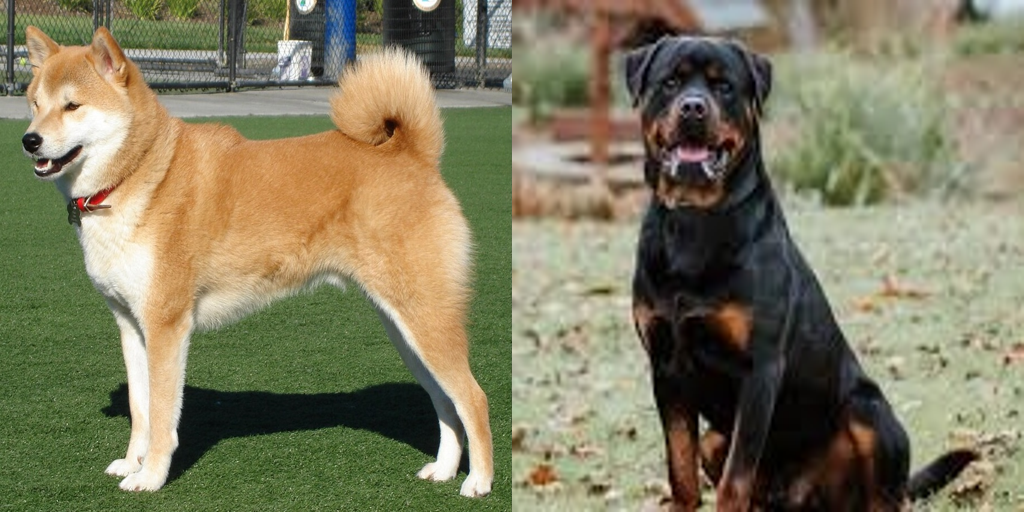

In [6]:
display_image_grid(["diffusion/dogs/shiba.jpeg", "diffusion/dogs/rot.jpeg"], (1,2))

Model Training

In [34]:
!accelerate launch diffusion/fine_tune_dreambooth.py --prompt="photo of a dog" --input_data_dir="diffusion/dogs" --max_train_steps=500 --train_batch_size=1

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2024-03-29 19:46:55.839799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 19:46:55.839846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 19:46:55.841321: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

In [31]:
import torch

tensor = torch.zeros((1,1,1,4,4))
print(tensor.shape)

mask = torch.stack(
    [
        torch.nn.functional.interpolate(mask, size=(512 // 8, 512 // 8))
        for mask in tensor
    ]
)
mask = mask.reshape(-1, 1, 512 // 8, 512 // 8)

print(mask.shape)

torch.Size([1, 1, 1, 4, 4])
torch.Size([1, 1, 64, 64])
